In [2]:
import pandas as pd
import sqlite3

## Подкючаемя к базе

In [6]:
conn = sqlite3.connect('..\\data\\checking-logs.sqlite.sqlite_copy')

## Выгружаем данные

In [7]:
df = pd.io.sql.read_sql(
    "select uid, datetime from pageviews where uid like 'user_%'",
    conn, parse_dates=['datetime']
    )
df.head()

,uid,datetime
0,user_30,2020-04-17 22:46:26.785035
1,user_14,2020-04-18 10:53:52.623447
2,user_17,2020-04-18 10:56:55.833899
3,user_14,2020-04-18 10:57:37.331258
4,user_17,2020-04-18 12:05:48.200144


## Вычисляем количество

In [8]:
df1 = df['datetime'].dt.floor('d').value_counts()
df1 = df1.rename_axis('date')
df1 = df1.reset_index(name='views')
df1

,date,views
0,2020-05-11,200
1,2020-05-14,187
2,2020-05-10,110
3,2020-05-13,102
4,2020-05-12,85
5,2020-05-18,51
6,2020-05-08,48
7,2020-05-15,29
8,2020-04-18,23
9,2020-05-09,19


## Строим график

<AxesSubplot:title={'center':'Views per day'}, xlabel='date'>

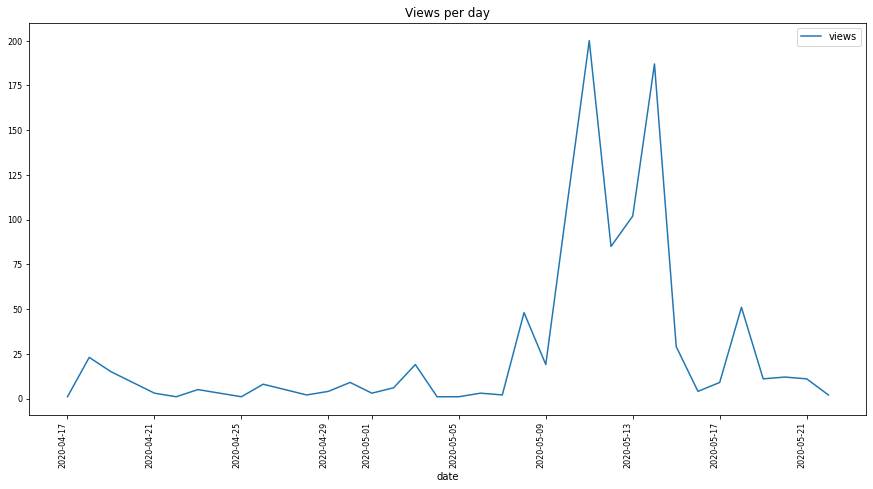

In [10]:
df1.plot(x='date', y='views', figsize=(15, 8),
          title='Views per day', rot=90, fontsize=8)

## Закрываем соединение

In [11]:
conn.close()